# Messing with word2vec (IMDB movies reviews)
#### With nltk :
 - Tokenize each sentence with word tokenize from nltk (try RegExpTokenizer) 
 - Eliminate Stop Words (set(stopwords.words("english")))
 - Lemmatizing or stemming (it's the Normalization for nlp)
#### With gensim :
 - Explore Word2Vec from gensim (how to get the best results of Word embedding)
 - Evaluate Word2Vec result with the similarity index
 - Explore Cosine similarity metric for evaluating Word2Vec
 - Word analogy task 'man is to woman as king is to queen'
#### Large Movie Review Dataset

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.  Link : ai.stanford.edu/~amaas/data/sentiment/

In [2]:
import nltk
nltk.download()
nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to /Users/thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
%matplotlib inline

### Read reviews from folder

In [4]:
listpath = ['/Users/thomas/Downloads/aclImdb/train/pos',
            '/Users/thomas/Downloads/aclImdb/train/neg',
            '/Users/thomas/DownloadsaclImdb/test/pos',
            '/Users/thomas/Downloads/aclImdb/test/neg']
train_pos = []
train_neg = []
test_pos = []
test_neg = []

for p in listpath:
    for root, dirs, filenames in os.walk(p):
        for f in filenames:
            log = open(os.path.join(root, f), 'r', encoding='utf-8', errors='ignore').read()
            if p == listpath[0]:
                train_pos.append((log,'pos'))
            if p == listpath[1]:
                train_neg.append((log,'neg'))
            if p == listpath[2]:
                test_pos.append((log,'pos'))
            if p == listpath[3]:
                test_neg.append((log,'neg'))

In [5]:
print("Positif Training exemples :",len(train_pos))
print("negatif Training exemples :",len(train_neg))
print("Positif Test exemples :",len(test_pos))
print("negatif Test exemples :",len(test_neg))

Positif Training exemples : 12500
negatif Training exemples : 12500
Positif Test exemples : 0
negatif Test exemples : 12500


In [6]:
train_pos[1]

('Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D\'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of "Rosemary\'s Baby" and "The Exorcist"--but what a combination! Based on the best-seller by Jeffrey Konvitz, "The Sentinel" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downb

In [7]:
Traindf = pd.DataFrame(train_pos+train_neg, columns=['Text','Sent'])
Testdf = pd.DataFrame(test_pos+test_neg, columns=['Text','Sent'])
Traindf.head()

,Text,Sent
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [8]:
Testdf.head()

,Text,Sent
0,Alan Rickman & Emma Thompson give good perform...,neg
1,I have seen this movie and I did not care for ...,neg
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",neg
3,"This film is bundled along with ""Gli fumavano ...",neg
4,I only comment on really very good films and o...,neg


## NLTK natural language Tool Kit
- NLTK is a leading platform for building Python programs to work with human language data(NLP)
- with ** word_tokenize ** we can extract the words from the text
- with ** sent_tokenize ** we can extract the sentences from the text

### Tokenization is the process of dividing the corpus into words or sentences for further processing
-  In this Case we can work with RegExpTokenizer that handle the ponctuation and special characters

In [9]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer


def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(Testdf['Text'][5])
print("Words : ",Words)
print("Sents :",Sents)
Words = RegExpTokenizer(Testdf['Text'][5])
print(RegExpTokenizer(Testdf['Text'][5]))

Words :  ['When', 'you', 'look', 'at', 'the', 'cover', 'and', 'read', 'stuff', 'about', 'it', 'an', 'entirely', 'different', 'type', 'of', 'movie', 'comes', 'to', 'mind', 'than', 'what', 'you', 'get', 'here', '.', 'Then', 'again', 'maybe', 'I', 'read', 'the', 'summary', 'for', 'the', 'other', 'movie', 'called', '``', 'Mausolem', "''", 'instead', 'as', 'there', 'were', 'two', 'movies', 'of', 'this', 'title', 'released', 'about', 'the', 'same', 'time', 'with', 'both', 'featuring', 'plots', 'that', 'had', 'key', 'elements', 'in', 'common', '.', 'However', ',', 'reading', 'stuff', 'about', 'that', 'movie', 'here', 'I', 'know', 'I', 'saw', 'this', 'one', 'and', 'not', 'that', 'one', 'and', 'that', 'movie', 'is', 'even', 'less', 'what', 'one', 'would', 'imagine', 'a', 'movie', 'with', 'that', 'title', 'would', 'be', 'about', '.', 'I', 'will', 'be', 'honest', ',', 'I', 'expect', 'more', 'of', 'a', 'zombie', 'type', 'picture', 'and', 'you', 'get', 'that', 'in', 'this', 'movie', 'to', 'some', '

## Stop Words : useless words that we need to eliminate
-  NLTk offers English most popular StopWords with ** stop_Words **

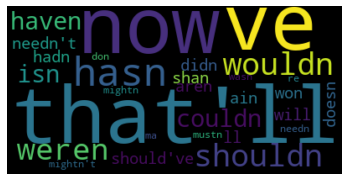

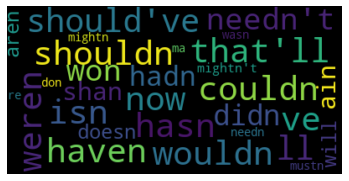

In [12]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = set(stopwords.words("english"))
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(stop_words))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(stop_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{"that'll", 'his', 'we', 'those', 'how', 'now', 'she', 'her', 'should', 've', 'did', 'out', 'other', 'to', 'its', 'hasn', 'shouldn', 'both', "weren't", 'whom', 'where', 'has', 'm', 'having', 'of', 'for', 'a', 'between', 'while', 'over', 'so', 'it', 'or', 'wouldn', "doesn't", 'these', "it's", "hadn't", 'until', 'then', 'me', 'off', "mustn't", 'the', 'too', 'weren', 'd', "shouldn't", 'than', 'couldn', 'further', 'been', 'why', 'isn', 'haven', "should've", 'just', "you'll", "you'd", 'll', 'himself', "hasn't", 'because', "needn't", 'such', 'before', 'no', 'myself', 'was', 'by', 'during', 'won', 'you', 'ourselves', "couldn't", 'yours', 'didn', "she's", 'hadn', 'yourself', "wouldn't", 'shan', 'as', 'my', 'any', 'below', 'am', 't', "aren't", "you're", 'ain', 'doesn', 'into', 'he', 'if', 'yourselves', "won't", 'each', "didn't", 'from', 'their', 'about', 'after', 'more', 'under', 'will', 'once', "wasn't", 'through', 'what', 'are', 'your', 'they', 'there', 'them', 'herself', 'can', 'an', 'y', 'a

## Stemming is the Normaization in the NLP
- we try to eliminate all charcters at the end of each word 'ing' 'ed' 'er' to gain in computational because the meaning does not change if we eliminate them we gain in Computational Efficiency : 
- example :
- python
- pythoning
- pythoner
- ext ..
- so with the stemming we gain computation

In [14]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print(Stemmed_Words)

['when', 'look', 'cover', 'read', 'stuff', 'entir', 'differ', 'type', 'movi', 'come', 'mind', 'get', 'then', 'mayb', 'I', 'read', 'summari', 'movi', 'call', 'mausolem', 'instead', 'two', 'movi', 'titl', 'releas', 'time', 'featur', 'plot', 'key', 'element', 'common', 'howev', 'read', 'stuff', 'movi', 'I', 'know', 'I', 'saw', 'one', 'one', 'movi', 'even', 'less', 'one', 'would', 'imagin', 'movi', 'titl', 'would', 'I', 'honest', 'I', 'expect', 'zombi', 'type', 'pictur', 'get', 'movi', 'degre', 'howev', 'stuff', 'involv', 'occult', 'strang', 'power', 'open', 'scene', 'peopl', 'taken', 'away', 'coron', 'begin', 'film', 'attest', 'the', 'movi', 'also', 'old', 'theme', 'kid', 'go', 'somewher', 'belong', 'crazi', 'parti', 'case', 'fact', 'mausoleum', 'the', 'movi', 'I', 'think', 'realli', 'key', 'featur', 'play', 'promin', 'role', 'movi', 'I', 'see', 'score', 'one', 'higher', 'still', 'movi', 'I', 'expect']


## Lemmatizing is like the Stemming
- instead of returning the same words with the last charcteres removed it returns the root of the word or another word synonymous so the returns are true English words

In [15]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print(Lemmatized_Words)

['When', 'look', 'cover', 'read', 'stuff', 'entirely', 'different', 'type', 'movie', 'come', 'mind', 'get', 'Then', 'maybe', 'I', 'read', 'summary', 'movie', 'called', 'Mausolem', 'instead', 'two', 'movie', 'title', 'released', 'time', 'featuring', 'plot', 'key', 'element', 'common', 'However', 'reading', 'stuff', 'movie', 'I', 'know', 'I', 'saw', 'one', 'one', 'movie', 'even', 'le', 'one', 'would', 'imagine', 'movie', 'title', 'would', 'I', 'honest', 'I', 'expect', 'zombie', 'type', 'picture', 'get', 'movie', 'degree', 'However', 'stuff', 'involving', 'occult', 'strange', 'power', 'opening', 'scene', 'people', 'taken', 'away', 'coroner', 'beginning', 'film', 'attest', 'The', 'movie', 'also', 'old', 'theme', 'kid', 'going', 'somewhere', 'belong', 'crazy', 'party', 'case', 'fact', 'mausoleum', 'The', 'movie', 'I', 'think', 'really', 'key', 'feature', 'playing', 'prominent', 'role', 'movie', 'I', 'see', 'score', 'one', 'higher', 'still', 'movie', 'I', 'expecting']


In [23]:
Texts = list(Traindf['Text']) + list(Testdf['Text'])

In [24]:
len(Texts)

37500

In [25]:
#GEt words from Review_text = Tokenize 
#RegExpTokenizer to get rid of ponctuation
ListWords =  [RegExpTokenizer(str(m)) for m in Texts]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Lemmatizing
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])


['Bizarre', 'horror', 'movie', 'filled', 'with', 'famous', 'faces', 'but', 'stolen', 'by', 'Cristina', 'Raines', 'later', 'of', 'TV', 's', 'Flamingo', 'Road', 'as', 'a', 'pretty', 'but', 'somewhat', 'unstable', 'model', 'with', 'a', 'gummy', 'smile', 'who', 'is', 'slated', 'to', 'pay', 'for', 'her', 'attempted', 'suicides', 'by', 'guarding', 'the', 'Gateway', 'to', 'Hell', 'The', 'scenes', 'with', 'Raines', 'modeling', 'are', 'very', 'well', 'captured', 'the', 'mood', 'music', 'is', 'perfect', 'Deborah', 'Raffin', 'is', 'charming', 'as', 'Cristina', 's', 'pal', 'but', 'when', 'Raines', 'moves', 'into', 'a', 'creepy', 'Brooklyn', 'Heights', 'brownstone', 'inhabited', 'by', 'a', 'blind', 'priest', 'on', 'the', 'top', 'floor', 'things', 'really', 'start', 'cooking', 'The', 'neighbors', 'including', 'a', 'fantastically', 'wicked', 'Burgess', 'Meredith', 'and', 'kinky', 'couple', 'Sylvia', 'Miles', 'Beverly', 'D', 'Angelo', 'are', 'a', 'diabolical', 'lot', 'and', 'Eli', 'Wallach', 'is', 'gr

In [26]:
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words

    ListWords2 = []
    for m in ListWords:
        result =[]
        for w in m:
            if w != 'this' and w != 'br' and len(w) > 2 :
                result.append(w)
        ListWords2.append(result)

    return ListWords2

In [23]:
ListWords = eliminate_irrelevent_Words(ListWords)
ListWords[1]

['homelessness',
 'houselessness',
 'george',
 'carlin',
 'stated',
 'issue',
 'year',
 'never',
 'plan',
 'help',
 'street',
 'considered',
 'human',
 'everything',
 'going',
 'school',
 'work',
 'vote',
 'matter',
 'most',
 'people',
 'think',
 'homeless',
 'lost',
 'cause',
 'worrying',
 'thing',
 'racism',
 'war',
 'iraq',
 'pressuring',
 'kid',
 'succeed',
 'technology',
 'election',
 'inflation',
 'worrying',
 'next',
 'end',
 'street',
 'but',
 'given',
 'bet',
 'live',
 'street',
 'month',
 'without',
 'luxury',
 'home',
 'entertainment',
 'set',
 'bathroom',
 'picture',
 'wall',
 'computer',
 'everything',
 'treasure',
 'see',
 'like',
 'homeless',
 'that',
 'goddard',
 'bolt',
 'lesson',
 'mel',
 'brooks',
 'directs',
 'star',
 'bolt',
 'play',
 'rich',
 'man',
 'everything',
 'world',
 'deciding',
 'make',
 'bet',
 'sissy',
 'rival',
 'jeffery',
 'tambor',
 'see',
 'live',
 'street',
 'thirty',
 'day',
 'without',
 'luxury',
 'bolt',
 'succeeds',
 'want',
 'future',
 'projec

In [22]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(str(w.lower()))
    all_words = FreqDist(all_words)
    #print(all_words.most_common(300))
    #print(len(all_words.keys()))
    return all_words

In [26]:
all_words = Bag_Of_Words(ListWords)

In [27]:
len(all_words)

95430

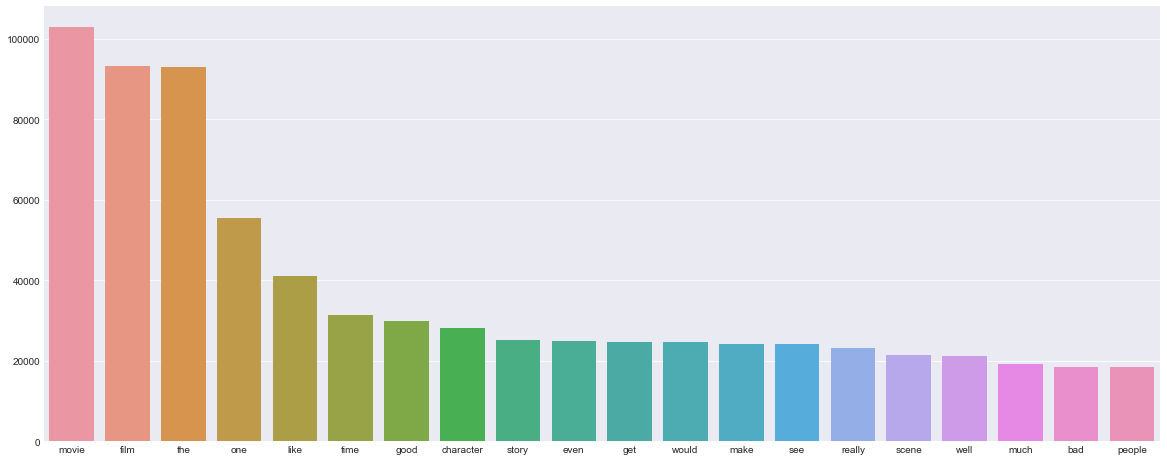

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(20,8))
count = []
Words  = []
for w in all_words.most_common(20):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

#### Motivation: Why Word Embeddings?

Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, or e.g. power spectral density coefficients for audio data. For tasks like object or speech recognition we know that all the information required to successfully perform the task is encoded in the data (because humans can perform these tasks from the raw data). However, natural language processing systems traditionally treat words as discrete atomic symbols, and therefore 'cat' may be represented as Id537 and 'dog' as Id143. These encodings are arbitrary, and provide no useful information to the system regarding the relationships that may exist between the individual symbols. This means that the model can leverage very little of what it has learned about 'cats' when it is processing data about 'dogs' (such that they are both animals, four-legged, pets, etc.). Representing words as unique, discrete ids furthermore leads to data sparsity, and usually means that we may need more data in order to successfully train statistical models. Using vector representations can overcome some of these obstacles.
https://www.tensorflow.org/tutorials/word2vec
#### How word2vec works:

The idea behind word2vec is that:

    Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
    Feed it a word and train it to predict its neighbouring word.
    Remove the last (output layer) and keep the input and hidden layer.
    Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.
Two popular examples of methods of learning word embeddings from text include:

    Word2Vec.
    GloVe.

In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

- word2vec

word2vec is a well known concept, used to generate representation vectors out of words.

There are many good tutorials online about word2vec, like this one and this one, but describing doc2vec without word2vec will miss the point, so I’ll be brief.

In general, when you like to build some model using words, simply labeling/one-hot encoding them is a plausible way to go. However, when using such encoding, the words lose their meaning. e.g, if we encode  ** Paris as id_4, France as id_6 and power as id_8 **, France will have the  ** same relation to power as with Paris **. We would prefer a representation in which France and Paris will be closer than France and power.

The word2vec, presented in 2013 in this article, intends to give you just that: a numeric representation for each word, that will be able to capture such relations as above. this is part of a wider concept in machine learning — the feature vectors.

Such representations, encapsulate different relations between words, like synonyms, antonyms, or analogies, such as this one:
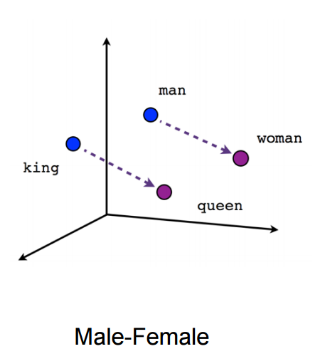

### Word2vec algorithms

So how is it done? word2vec representation is created using 2 algorithms: Continuous Bag-of-Words model (CBOW) and the Skip-Gram model.

### Continuous bag of words

continuous bag of words creates a sliding window around current word, to predict it from “context” — the surrounding words. Each word is represented as a feature vector. after training, these vectors become the word vectors.
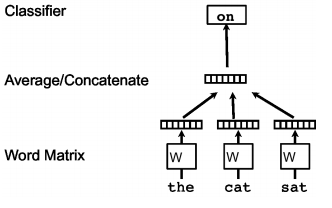

### Skip gram

The second algorithm is actaully the opposite of CBOW: instead of prediciting one word each time, we use 1 word to predict all surrounding words (“context”) skip gram is much slower than CBOW, but considered more accurate with infrequent words.

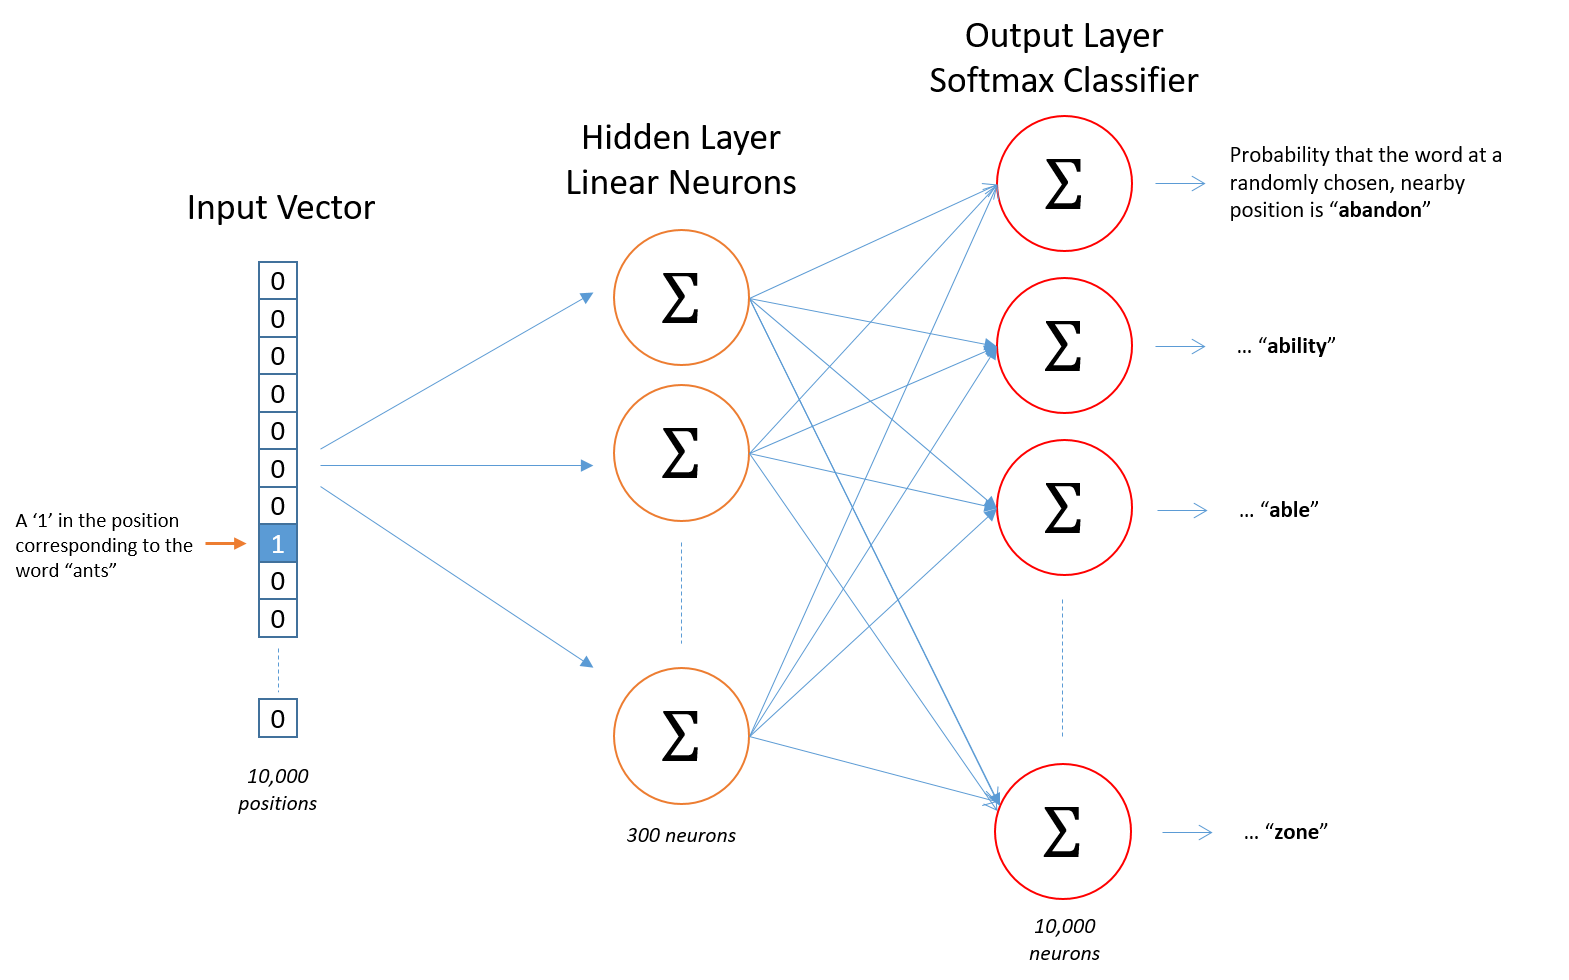
#### The Hidden Layer
For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).
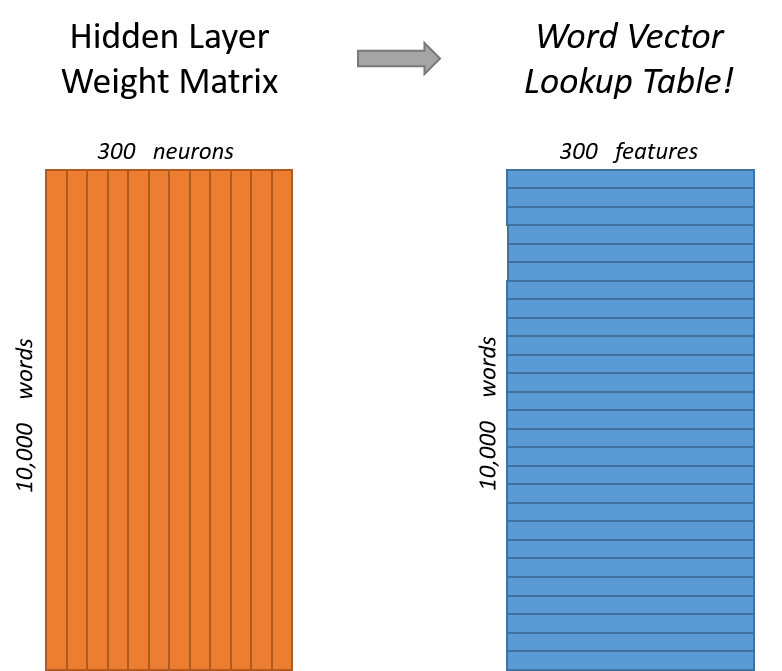

Now, you might be asking yourself–“That one-hot vector is almost all zeros… what’s the effect of that?” If you multiply a 1 x 10,000 one-hot vector by a 10,000 x 300 matrix, it will effectively just select the matrix row corresponding to the “1”. Here’s a small example to give you a visual.

Effect of matrix multiplication with a one-hot vector
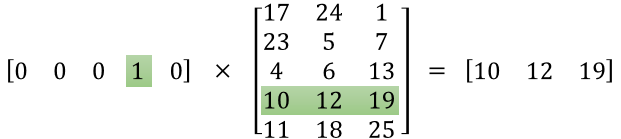

In [1]:
import gensim, logging
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Load model

In [ ]:
model = Word2Vec.load('w2vMovies.bin')

In [3]:
words = list(model.wv.vocab)
print(words[:100])

['inducted', 'dormael', 'effie', 'analyse', 'wachowski', 'crest', 'site', 'newton', 'pitchfork', 'capitalism', 'discrimination', 'travis', 'grapewin', 'rehash', 'comforts', 'tlc', 'sociologist', 'proudly', 'cryin', 'slasher', 'barmy', 'bruise', 'astaire', 'spades', 'rottingham', 'cocktails', 'hurled', 'incomparable', 'jafri', 'peaks', 'sector', 'porgy', 'rug', 'cared', 'cone', 'ravaging', 'philadelphia', 'ace', 'taelons', 'horrid', 'vcrs', 'rant', 'craft', 'substandard', 'cucumber', 'ladd', 'layered', 'dawson', 'carface', 'etcetera', 'bench', 'cairo', 'ferguson', 'molesting', 'teammate', 'spiked', 'garlic', 'build', 'carl', 'sparring', 'worrying', 'zimbalist', 'eadie', 'organization', 'portentous', 'bilal', 'aided', 'durning', 'disposable', 'conventionally', 'vigilantism', 'provide', 'rheostatics', 'worth', 'unleash', 'dyson', 'bore', 'avoid', 'ros', 'polemic', 'manner', 'marker', 'cheese', 'tongue', 'casa', 'someday', 'orgy', 'dsm', 'bogdanovich', 'rocked', 'predator', 'robotics', 'gu

### train model
Word2vec documentation
https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

In [73]:
# train model
# class gensim.models.word2vec.Word2Vec(sentences=None, size=100, alpha=0.025, window=5,
# min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001,
# sg=0, hs=0, negative=5, cbow_mean=1, hashfxn=<built-in function hash>,
iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=())
model = Word2Vec(ListWords,size = 300 )
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print("first 100 words : ",words[:100])
# access vector for one word
print(model['good'])
# save model
model.save('w2vMovies.bin')

Word2Vec(vocab=36013, size=300, alpha=0.025)
first 100 words :  ['engraved', 'spinell', 'phd', 'hairdo', 'enters', 'clued', 'decrease', 'vartan', 'angrily', 'seema', 'lifetime', 'fixing', 'grodin', 'guantanamo', 'vigilance', 'jabez', 'gabriel', 'ova', 'inbetween', 'reel', 'lines', 'northwestern', 'wistful', 'blonde', 'larking', 'arresting', 'weirdness', 'forgoes', 'wipe', 'promised', 'differently', 'tramp', 'newcomer', 'anakin', 'pure', 'frodo', 'recycles', 'variously', 'haden', 'religion', 'shined', 'bihn', 'offencive', 'feminine', 'criticism', 'established', 'estelle', 'zorak', 'category', 'marischka', 'takeshi', 'middle', 'protect', 'tome', 'dual', 'julien', 'mammy', 'groucho', 'duhamel', 'buffoon', 'forsythe', 'bluto', 'countryman', 'filmography', 'madhouse', 'prosecuted', 'arbor', 'homelessness', 'that', 'pulsing', 'typically', 'oldster', 'manticore', 'billy', 'condone', 'giada', 'independently', 'bellhop', 'prudish', 'gorris', 'flopping', 'shard', 'subversion', 'chen', 'faris', '

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [5]:
model['movie']

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([  1.11626017e+00,  -7.95568526e-02,   7.91970670e-01,
        -1.13159871e+00,   3.49783331e-01,   7.18167365e-01,
         1.96826369e-01,  -3.94786477e-01,  -9.26390290e-01,
         1.95148337e+00,  -7.44914487e-02,  -5.81557095e-01,
        -6.08923733e-01,  -5.41415632e-01,  -2.61603463e-02,
        -7.96831191e-01,   1.32535025e-01,   1.20247090e+00,
         3.61971818e-02,   2.39347309e-01,  -5.96596360e-01,
         3.05153012e-01,   3.78485620e-01,  -5.56902170e-01,
         6.51263535e-01,   9.63126421e-01,   2.40150079e-01,
        -4.25160676e-01,   1.81810096e-01,  -2.19684280e-02,
        -6.38455078e-02,   8.56760740e-01,   2.11850595e+00,
         6.84252501e-01,   5.08103482e-02,  -5.04347563e-01,
         3.54180306e-01,  -5.02068520e-01,   1.34802806e+00,
         6.33424580e-01,  -4.10294533e-01,  -3.71189028e-01,
        -3.73063385e-01,  -1.91765046e+00,  -3.71028066e-01,
        -7.43667185e-01,   3.72904181e-01,   8.25850785e-01,
         1.09321272e+00,

### Similarity Index

In [75]:
model.most_similar(positive=['good', 'awesome'], negative=['bad'], topn=8)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fantastic', 0.6896875500679016),
 ('great', 0.644116997718811),
 ('terrific', 0.6205437183380127),
 ('amazing', 0.6131793260574341),
 ('cool', 0.6112569570541382),
 ('wonderful', 0.6034924983978271),
 ('excellent', 0.5922461748123169),
 ('fine', 0.5706367492675781)]

In [116]:
model.most_similar('leonardo', topn=5)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dicaprio', 0.8999871015548706),
 ('danielle', 0.8565436601638794),
 ('ferrer', 0.8389886617660522),
 ('dianne', 0.8387475609779358),
 ('elias', 0.838255763053894)]

In [98]:
model.most_similar('titanic', topn=10)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('armageddon', 0.6156220436096191),
 ('2001', 0.612362802028656),
 ('1999', 0.6071518659591675),
 ('11th', 0.6045618057250977),
 ('watershed', 0.5937971472740173),
 ('voyage', 0.592188835144043),
 ('feb', 0.591284990310669),
 ('hamiltons', 0.5907867550849915),
 ('28th', 0.5895237922668457),
 ('leagues', 0.5893083214759827)]

In [78]:
model.most_similar(positive=["david","female"],negative=["male"])

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('anderson', 0.6592856049537659),
 ('andrew', 0.6536228656768799),
 ('brian', 0.6458417177200317),
 ('joel', 0.6449813842773438),
 ('morse', 0.6409985423088074),
 ('harvey', 0.6402158737182617),
 ('jonathan', 0.6361373662948608),
 ('eli', 0.6230521202087402),
 ('ridley', 0.621863842010498),
 ('stevens', 0.6186453700065613)]

# 1 - Cosine similarity

To measure how similar two words are, we need a way to measure the degree of similarity between two embedding vectors for the two words. Given two vectors $u$ and $v$, cosine similarity is defined as follows: 

$$\text{CosineSimilarity(u, v)} = \frac {u . v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

where $u.v$ is the dot product (or inner product) of two vectors, $||u||_2$ is the norm (or length) of the vector $u$, and $\theta$ is the angle between $u$ and $v$. This similarity depends on the angle between $u$ and $v$. If $u$ and $v$ are very similar, their cosine similarity will be close to 1; if they are dissimilar, the cosine similarity will take a smaller value. 

<img src="cossim.png">
<caption><center> **Figure 1**: The cosine of the angle between two vectors is a measure of how similar they are</center></caption>

**Exercise**: Implement the function `cosine_similarity()` to evaluate similarity between word vectors.

**Reminder**: The norm of $u$ is defined as $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$

In [11]:
# GRADED FUNCTION: cosine_similarity

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(sum(u**2))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(sum(v**2))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)
    
    return cosine_similarity

In [83]:
print("cosine_similarity(spiderman, superman) = ", cosine_similarity(model['spiderman'],model['superman']))
print("cosine_similarity(batman, bruce) = ", cosine_similarity(model['batman'],model['bruce']))
print("cosine_similarity(batman, david) = ", cosine_similarity(model['batman'],model['david']))
print("cosine_similarity(batman, wayne) = ", cosine_similarity(model['batman'],model['wayne']))
print("cosine_similarity(bruce, wayne) = ", cosine_similarity(model['bruce'],model['wayne']))
print("cosine_similarity(dragon, goku) = ", cosine_similarity(model['dragon'],model['goku']))
print("cosine_similarity(good, amazing) = ", cosine_similarity(model['good'],model['amazing']))
print("cosine_similarity(bad, terrible) = ", cosine_similarity(model['bad'],model['terrible']))

cosine_similarity(spiderman, superman) =  0.442303274002
cosine_similarity(batman, bruce) =  0.434657004154
cosine_similarity(batman, david) =  0.175849632163
cosine_similarity(batman, wayne) =  0.228202452341
cosine_similarity(bruce, wayne) =  0.520037398255
cosine_similarity(dragon, goku) =  0.459647737279
cosine_similarity(good, amazing) =  0.488699611776
cosine_similarity(bad, terrible) =  0.648936873948


D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
D:\Users\ala94\Anaconda3\envs

#### Word analogy task 'man is to woman as king is to queen'.

In [12]:
# GRADED FUNCTION: complete_analogy

def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    # convert words to lower case
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    ### START CODE HERE ###
    # Get the word embeddings v_a, v_b and v_c (≈1-3 lines)
    e_a, e_b, e_c = word_to_vec_map[word_a],word_to_vec_map[word_b],word_to_vec_map[word_c]
    ### END CODE HERE ###
    words = list(word_to_vec_map.wv.vocab)
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    # loop over the whole word vector set
    for w in words:   
        # to avoid best_word being one of the input words, pass on them.
        if w in [word_a, word_b, word_c] :
            continue

        ### START CODE HERE ###
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)

        cosine_sim = cosine_similarity((e_b - e_a),(word_to_vec_map[w] - e_c))
        
        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        ### END CODE HERE ###
        
    return best_word

In [15]:
triads_to_try = [('man','woman','boy'),('bad','good','terrible'),('movie','film','scene'),('hollywood','film','titanic')
                ,('tom','hanks','leonardo')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,model)))

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


man -> woman :: boy -> girl
bad -> good :: terrible -> fine
movie -> film :: scene -> photographed
hollywood -> film :: titanic -> movie
tom -> hanks :: leonardo -> aesthetic


### amazon most similar words

In [114]:
model.similar_by_word ('amazon', topn = 5)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('www', 0.8678028583526611),
 ('com', 0.8618041276931763),
 ('http', 0.8524438142776489),
 ('online', 0.8250098824501038),
 ('petition', 0.822016179561615)]

In [123]:
model.similar_by_word ('pixar', topn = 10)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('dreamworks', 0.7269163131713867),
 ('newer', 0.7166574001312256),
 ('disney', 0.6582891345024109),
 ('bakshi', 0.656207263469696),
 ('animated', 0.6554553508758545),
 ('shrek', 0.6529505252838135),
 ('wladyslaw', 0.6430259943008423),
 ('miyazaki', 0.6423596143722534),
 ('ova', 0.6410663723945618),
 ('remixed', 0.6396569609642029)]

In [113]:
model.doesnt_match("avatar james cameron soccer".split())

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'soccer'

In [126]:
X = model[model.wv.vocab]

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [129]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Cluster id labels for inputted data
[1 1 1 ..., 1 1 1]
Centroids data
[[  3.94210778e-02  -2.82969326e-01  -1.25770435e-01   2.89377809e-01
    9.33265537e-02   7.66786337e-02  -1.52354658e-01   2.35039249e-01
    1.04301266e-01   6.60455599e-02   2.44318992e-01   1.05398208e-01
    2.51773298e-01   1.20286040e-01  -3.72863701e-03   2.50055969e-01
    3.33758742e-01  -8.20750892e-02   5.05331829e-02  -2.68959463e-01
    1.90885186e-01  -9.63219628e-02   2.01698422e-01  -1.38862310e-02
   -1.55485570e-01   1.20318152e-01  -2.75264084e-01  -2.22438816e-02
    4.86522391e-02   1.89980343e-01  -3.21246505e-01   3.52348804e-01
   -1.86894149e-01   6.61578700e-02   3.99188548e-02  -6.80516958e-02
   -2.21504003e-01   1.92599654e-01  -1.37227744e-01   2.40866974e-01
    2.95584798e-01  -5.95963188e-03   1.38393864e-01   5.85108161e-01
    2.82124430e-02   2.51759291e-01  -2.73648426e-02  -5.24384193e-02
   -2.16855258e-01  -4.20033634e-01   2.08913162e-02   2.67764986e-01
    2.22222596e-01  

MemoryError: 

In [143]:
model.most_similar(positive=[centroids[0]],topn=1)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('alfre', 0.9447277188301086)]

In [142]:
model.most_similar(positive=[centroids[1]],topn=1)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('contra', 0.9507837891578674)]

In [141]:
model.most_similar(positive=[centroids[2]],topn=1)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('detract', 0.783515453338623)]

In [149]:
cluster0 = []
cluster1 = []
cluster2 = []
for i in list(model.wv.vocab):
    if kmeans.predict(model[i].reshape(1, -1)) == 0:
        cluster0.append(i)
    if kmeans.predict(model[i].reshape(1, -1)) == 1:
        cluster1.append(i)
    if kmeans.predict(model[i].reshape(1, -1)) == 2:
        cluster2.append(i)

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [152]:
print(cluster0[:100])

['enters', 'gabriel', 'blonde', 'tramp', 'newcomer', 'forsythe', 'billy', 'chen', 'jennifer', 'alvin', 'hottie', 'rick', 'steal', 'goodman', 'gertrude', 'maurice', 'sergeant', 'woronov', 'willie', 'wilkinson', 'savini', 'hearn', 'jessie', 'jeffrey', 'paltrow', 'directorial', 'fbi', 'eddy', 'chaplin', 'warren', 'performs', 'conroy', 'older', 'miles', 'salesman', 'performance', 'heroine', 'strauss', 'befriends', 'keanu', 'cameo', 'his', 'helena', 'sho', 'johansson', 'lieutenant', 'dave', 'dafoe', 'neeson', 'douglas', 'pierre', 'outlaw', 'hara', 'santa', 'beau', 'bob', 'lansbury', 'ellen', 'mother', 'driver', 'fernando', 'hogan', 'terry', 'playboy', 'collette', 'monroe', 'arnold', 'sharon', 'errol', 'belushi', 'brandauer', 'gyllenhaal', 'fred', 'wounded', 'fame', 'tina', 'matthau', 'orphan', 'ingrid', 'talent', 'elizabeth', 'pianist', 'benoit', 'veidt', 'carol', 'natalie', 'agrees', 'carrey', 'capt', 'saloon', 'versatile', 'bassett', 'dallas', 'ustinov', 'peters', 'cortez', 'clarke', 'tuc

In [153]:
print(cluster1[:100])

['engraved', 'spinell', 'phd', 'hairdo', 'clued', 'decrease', 'vartan', 'angrily', 'seema', 'fixing', 'grodin', 'guantanamo', 'vigilance', 'jabez', 'ova', 'inbetween', 'reel', 'lines', 'northwestern', 'wistful', 'larking', 'arresting', 'weirdness', 'forgoes', 'wipe', 'promised', 'anakin', 'frodo', 'recycles', 'variously', 'haden', 'shined', 'bihn', 'offencive', 'feminine', 'established', 'estelle', 'zorak', 'marischka', 'takeshi', 'middle', 'protect', 'tome', 'dual', 'julien', 'mammy', 'groucho', 'duhamel', 'buffoon', 'bluto', 'countryman', 'filmography', 'madhouse', 'prosecuted', 'arbor', 'homelessness', 'pulsing', 'typically', 'oldster', 'manticore', 'condone', 'giada', 'independently', 'bellhop', 'prudish', 'gorris', 'flopping', 'shard', 'subversion', 'faris', 'awakens', 'code', 'sect', 'hyeon', 'baloney', 'tooo', 'irked', 'utah', 'paradoxical', 'undervalued', 'courted', 'adolescent', 'assassinated', 'penalty', 'skews', 'grader', 'globus', 'bichir', 'emerged', 'timely', 'atmospheric

In [154]:
print(cluster2[:100])

['lifetime', 'differently', 'pure', 'religion', 'criticism', 'category', 'that', 'prepared', 'moment', 'trite', 'critical', 'error', 'screen', 'pain', 'mixture', 'attempted', 'filming', 'short', 'dire', 'wholly', 'sensitive', 'rhythm', 'shot', 'compare', 'nothing', 'suck', 'fact', 'dry', 'deliver', 'technology', 'neat', 'intended', 'solid', 'min', 'satisfy', 'entirely', 'energy', 'racism', 'examination', 'overrated', 'term', 'politics', 'altogether', 'tragic', 'seem', 'happen', 'horrible', 'pointed', 'negative', 'listen', 'just', 'horrifying', 'analysis', 'contained', 'cant', 'list', 'rest', 'skill', 'costume', 'better', 'stay', 'brilliant', 'cut', 'useful', 'number', 'tasteless', 'scene', 'lost', 'interested', 'ignored', 'innovative', 'flimsy', 'watched', 'kind', 'happy', 'possibly', 'dramatic', 'exist', 'progress', 'perception', 'horrid', 'credibility', 'bottom', 'forward', 'achieve', 'combine', 'silence', 'rarely', 'provocative', 'unfold', 'provided', 'background', 'sentimental', 'i

### you can do PCA or T-SNE to see how the words are represented in the space
- We got acceptable result with word2vec on a corpus of only 90000 imagine how it will be if you have millions of words that's way the best to use word2vec is to get a pretrained word embedding from big companies that have the ressources to train neural nets on billions of words ,you can find in this link many pretrained models from standford university GLOVE to google word2vec
http://ahogrammer.com/2017/01/20/the-list-of-pretrained-word-embeddings/
- You can download Google’s pre-trained model here. It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

In [6]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
modelgoogle = KeyedVectors.load_word2vec_format('D:\\GoogleNews-vectors-negative300.bin.gz', binary=True,limit = 100000)
#model.wv.save_word2vec_format('D:\\googlenews.txt')

In [15]:
triads_to_try = [('man','woman','boy'),('bad','good','terrible'),('man','king','woman'),('father','son','mother')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,modelgoogle)))

D:\Users\ala94\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


man -> woman :: boy -> girl
bad -> good :: terrible -> great
man -> king :: woman -> queen
father -> son :: mother -> daughter


In [ ]:
triads_to_try = [('man','woman','boy')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,modelgoogle)))

## You see right away the difference and we only used 100000 most frequent from the 3 million words in this word embedding corpus from google you can try any analogy and see how the model handles it